In [2]:
# Manipulacao de dados e operacoes
import pandas as pd 
import numpy as np 
from numpy import median
from itertools import combinations
from sklearn.model_selection import train_test_split
import math

# Visualizacao
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

# Estatistica
from statistics import mean 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report    # output: accuracy, f1-score, recall e precision
from sklearn.metrics import confusion_matrix

# Modelos de regressao
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor

# Modelos de Classificação
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# PCA
from sklearn.decomposition import PCA

# Nao-supervisionado
from sklearn.cluster import KMeans, DBSCAN

# Outras bibliotecas de modelos
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.externals import joblib

# Pre-processamento
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Outros
from datetime import datetime, timedelta
from scipy.special import expit
from scipy.io import arff
from sklearn.datasets import fetch_olivetti_faces, make_classification
from sklearn.datasets.samples_generator import make_blobs

In [3]:
# Lendo a base de dados
senai = pd.read_csv('senai_inep2.csv')

# Codificando colunas categóricas
le = LabelEncoder()
senai['NO_IES'] = le.fit_transform(senai['NO_IES'])
senai['NO_CURSO'] = le.fit_transform(senai['NO_IES'])
senai['ID_ALUNO'] = le.fit_transform(senai['ID_ALUNO'])
senai['DT_INGRESSO_CURSO'] = le.fit_transform(senai['DT_INGRESSO_CURSO'])

# Separando X e y
X = senai.drop(['TP_SITUACAO'], axis=1)
y = senai[['TP_SITUACAO']]

# Separando em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [10]:
senai.head()

,CO_IES,NO_IES,CO_CURSO,NO_CURSO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,ID_ALUNO,TP_COR_RACA,TP_SEXO,...,IN_DEFICIENCIA,DT_INGRESSO_CURSO,IN_RESERVA_VAGAS,IN_FINANCIAMENTO_ESTUDANTIL,IN_APOIO_SOCIAL,IN_ATIVIDADE_EXTRACURRICULAR,TP_ESCOLA_CONCLUSAO_ENS_MEDIO,IN_MATRICULA,IN_CONCLUINTE,TP_SITUACAO
0,1400,1,20516,1,3,1,1,2519,1,1,...,0,9,0,0,0,0,1,0,0,0
1,1400,1,20516,1,3,1,1,1663,0,1,...,0,9,0,0,0,0,1,1,1,1
2,1400,1,20516,1,3,1,1,1537,2,2,...,0,18,0,0,0,0,1,1,1,1
3,1400,1,20516,1,3,1,1,957,0,2,...,0,2,0,0,0,0,9,0,0,1
4,1400,1,20516,1,3,1,1,1257,0,1,...,0,10,0,0,0,0,1,0,0,0


In [4]:
pca = PCA(2)  # projecao de 21 para 2 dimensoes (colunas)
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(3309, 21)
(3309, 2)


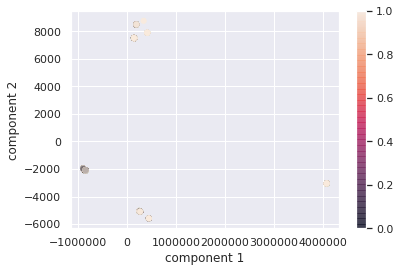

In [5]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y.values.ravel(), edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Escolhendo número de dimensões para PCA

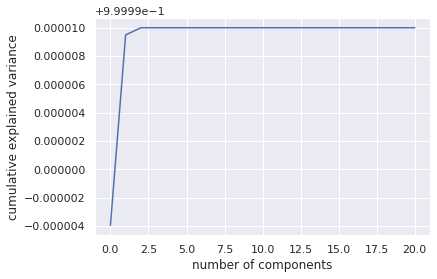

In [6]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**O grafico acima mostra que a variancia estabiliza em n_components = 2.**

In [7]:
# Codificando colunas categóricas
le = LabelEncoder()
senai['NO_IES'] = le.fit_transform(senai['NO_IES'])
senai['NO_CURSO'] = le.fit_transform(senai['NO_IES'])
senai['ID_ALUNO'] = le.fit_transform(senai['ID_ALUNO'])
senai['DT_INGRESSO_CURSO'] = le.fit_transform(senai['DT_INGRESSO_CURSO'])

# Saída a ser predita "y"
X = senai.drop(['TP_SITUACAO'], axis=1)
y = senai[['TP_SITUACAO']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [11]:
# Construindo pipelines
pipe_lr    = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('clf', LogisticRegression(solver='lbfgs'))])
pipe_knn   = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('clf', KNeighborsClassifier())])
pipe_dt    = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('clf', DecisionTreeClassifier())])
pipe_nb    = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('clf', GaussianNB())])
pipe_ridge = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('clf', RidgeClassifier())])
pipe_sgd   = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('clf', SGDClassifier())])

# Lista de pipelines a serem executados
pipelines = [pipe_lr, pipe_knn, pipe_dt, pipe_nb, pipe_ridge, pipe_sgd]

# parametros para aplicar no GridSearchCV
param_dict = {"pca__n_components": list(range(1,X.shape[1]))}


#estimator = []

#for pipe in pipelines: 
#    estimator.append(GridSearchCV(pipe, param_dict, verbose = 2))
    

# Dicionário para facilitar identificacao
pipe_dict = {0: 'Logistic Regression', 1: 'KNN', 2: 'Decision Tree', 3: 'Naive Bayes', 4: 'Ridge', 5: 'SGD'}

# aplicando fit
# Generaliza a execucao do fit de cada ultima funcao do pipe
for pipe in pipelines:
    pipe.fit(X_train, y_train.values.ravel())

# Compara acurácia
for i, pipe in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[i], pipe.score(X_test, y_test)))

# para cada modelo treinado obtem val score
best_acc = 0.0
best_clf = 0
best_pipe = ''
for i, pipe in enumerate(pipelines):
    # Descobre o melhor val.score e armazen em best_clf
    if pipe.score(X_test, y_test) > best_acc:
        best_acc = pipe.score(X_test, y_test)
        best_pipe = pipe
        best_clf = i
print('---\nClassifier with best accuracy: %s' % pipe_dict[best_clf])

Logistic Regression pipeline test accuracy: 0.893
KNN pipeline test accuracy: 0.893
Decision Tree pipeline test accuracy: 0.871
Naive Bayes pipeline test accuracy: 0.825
Ridge pipeline test accuracy: 0.899
SGD pipeline test accuracy: 0.871
---
Classifier with best accuracy: Ridge


In [16]:
#pipe_knn = Pipeline([('scl', StandardScaler()), ('clf', KNeighborsClassifier())])
# Construindo pipelines
pipe_lr    = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('clfLogreg', LogisticRegression(solver='lbfgs'))])
pipe_knn   = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('clfKnn', KNeighborsClassifier())])
pipe_dt    = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('clfTree', DecisionTreeClassifier())])
pipe_nb    = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('clfNb', GaussianNB())])
pipe_ridge = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('clfRidge', RidgeClassifier())])
pipe_sgd   = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('clfSgd', SGDClassifier())])


pipelines = [pipe_lr, pipe_knn, pipe_dt, pipe_nb, pipe_ridge, pipe_sgd]

param_range = [1, 2]

grid_params = [{'pca__n_components': list(range(1,X.shape[1]))}]

'''
grid_params = [{'clfTree__criterion': ['gini', 'entropy'],
    'clfTree__min_samples_leaf': param_range,
    'clfTree__max_depth': param_range,
    'clfTree__min_samples_split': param_range[1:],
    'clfTree__presort': [True, False],
    'pca__n_components': [2, 5, 9, 12, 15]}]
'''

pipe_dict = {0: 'Logistic Regression', 1: 'KNN', 2: 'Decision Tree', 3: 'Naive Bayes', 4: 'Ridge', 5: 'SGD'}

# Construct grid search
for i, pipe in enumerate(pipelines):
    gs = GridSearchCV(estimator  = pipe,
                      param_grid = grid_params,
                      scoring    = 'accuracy')
    
    gs.fit(X_train, y_train.values.ravel())
    # Best accuracy
    print('%s pipeline com PCA\n---' % pipe_dict[i])

    print('Best accuracy: %.3f' % gs.best_score_)

    # Best params
    print('\nBest params:', gs.best_params_)
    print("---")


/home/duanhubcwb/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Logistic Regression pipeline com PCA
---
Best accuracy: 0.895

Best params: {'pca__n_components': 17}
---


/home/duanhubcwb/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KNN pipeline com PCA
---
Best accuracy: 0.895

Best params: {'pca__n_components': 16}
---


/home/duanhubcwb/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Decision Tree pipeline com PCA
---
Best accuracy: 0.885

Best params: {'pca__n_components': 19}
---


/home/duanhubcwb/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Naive Bayes pipeline com PCA
---
Best accuracy: 0.867

Best params: {'pca__n_components': 1}
---


/home/duanhubcwb/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Ridge pipeline com PCA
---
Best accuracy: 0.889

Best params: {'pca__n_components': 17}
---


/home/duanhubcwb/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SGD pipeline com PCA
---
Best accuracy: 0.888

Best params: {'pca__n_components': 17}
---


# Conclusao
---

Acima foram testados os classificadores Logistic Regression, KNN, Decision Tree, Naive Bayes, Ridge e SGD, todos atraves de um pipeline com aplicacao de PCA (para reducao otima de colunas).